In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('1.2.1.3 List common tools used in Data Analytics/Airline_Delay_Cause.csv')

# Check for missing values
print(df.isnull().sum())


year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64


In [5]:

# Handle missing values (e.g., fill with the median or remove rows)
# Handle missing values
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical column
        # Fill missing values with the mode (most frequent value) for categorical columns
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numerical column
        # Fill missing values with the median for numerical columns
        df[column].fillna(df[column].median(), inplace=True)

# Check for missing values again
print(df.isnull().sum())



/tmp/ipykernel_19211/280151657.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
/tmp/ipykernel_19211/280151657.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64


In [6]:

# Example: Convert 'carrier' and 'airport' columns to category type
df['carrier'] = df['carrier'].astype('category')
df['airport'] = df['airport'].astype('category')

# Normalize numerical data (optional, but helps in clustering)
from sklearn.preprocessing import StandardScaler
numerical_features = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 
                      'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 
                      'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check the dataset after preprocessing
print(df.head())


   year  month carrier       carrier_name airport  \
0  2023      8      9E  Endeavor Air Inc.     ABE   
1  2023      8      9E  Endeavor Air Inc.     ABY   
2  2023      8      9E  Endeavor Air Inc.     AEX   
3  2023      8      9E  Endeavor Air Inc.     AGS   
4  2023      8      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...    -0.275296  -0.297262   
1             Albany, GA: Southwest Georgia Regional    -0.302507  -0.313992   
2           Alexandria, LA: Alexandria International    -0.302507  -0.313992   
3        Augusta, GA: Augusta Regional at Bush Field    -0.298476  -0.302839   
4                   Albany, NY: Albany International    -0.272273  -0.247074   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0   -0.368446   -0.088620  ...    -0.218819         -0.245408      -0.126565   
1   -0.374015   -0.302042  ...    -0.218

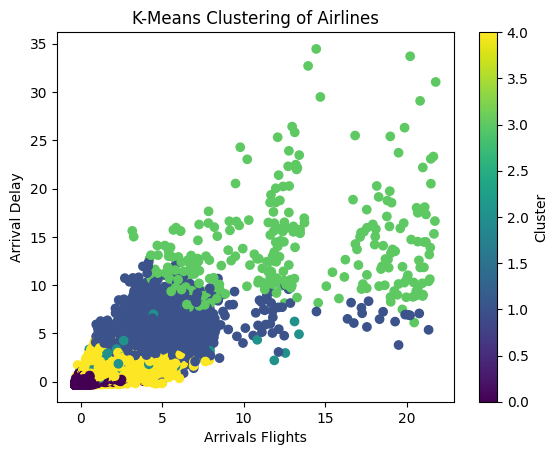

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for clustering
X = df[numerical_features]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(df['arr_flights'], df['arr_delay'], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering of Airlines')
plt.xlabel('Arrivals Flights')
plt.ylabel('Arrival Delay')
plt.colorbar(label='Cluster')
plt.show()


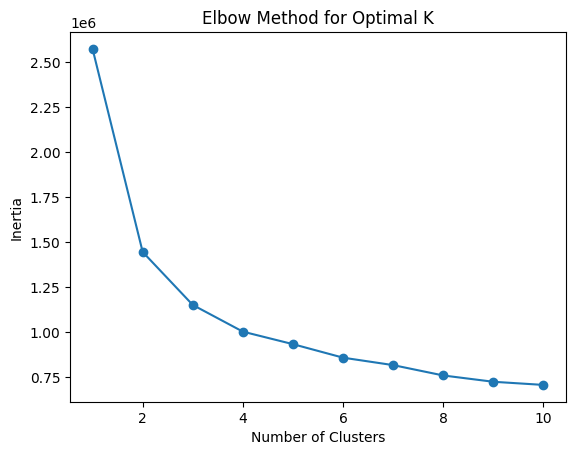

In [8]:
# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


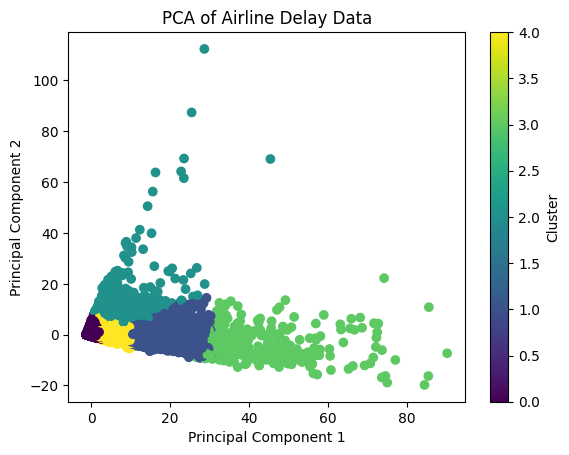

In [9]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

# Visualize the reduced data
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['cluster'], cmap='viridis')
plt.title('PCA of Airline Delay Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


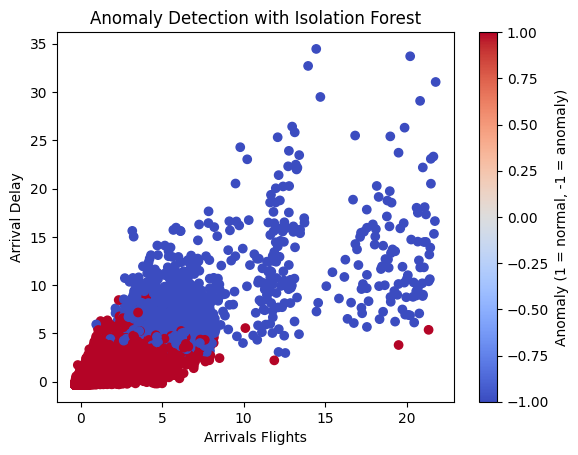

In [10]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # contamination is the fraction of outliers
df['anomaly'] = iso_forest.fit_predict(X)

# Visualize the anomalies
plt.scatter(df['arr_flights'], df['arr_delay'], c=df['anomaly'], cmap='coolwarm')
plt.title('Anomaly Detection with Isolation Forest')
plt.xlabel('Arrivals Flights')
plt.ylabel('Arrival Delay')
plt.colorbar(label='Anomaly (1 = normal, -1 = anomaly)')
plt.show()


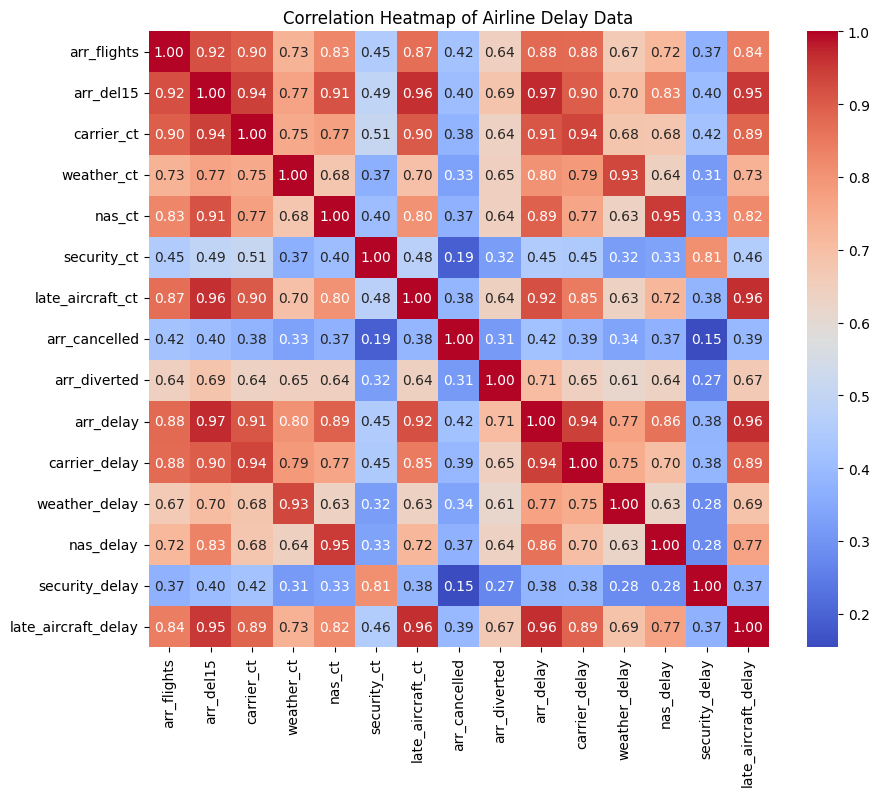

In [11]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df[numerical_features].corr()

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Airline Delay Data')
plt.show()
